In [1]:
import numpy as np
import cv2
import os
import random
import tensorflow as tf
import matplotlib as mpl
import time
from os import path
from PIL import Image
from matplotlib import pyplot as plt
from pathlib import Path


INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [37]:
def model_predict(model,img,target_height,target_width):

    img_resized = tf.image.resize_with_pad(img, target_height, target_width)
    img_resized = tf.cast(img_resized, dtype=tf.int32)
    sample_input = np.array([np.asarray(img_resized[:, :, :3]),])
    predicted = model.predict(sample_input)
    i_class_pred = np.argmax(predicted)
    predicted = predicted[0]
    if predicted[i_class_pred] < 0.6:
        i_class_pred = 3
        predicted = np.array([0,0,0,1])
        
    return i_class_pred, predicted

In [7]:
model = tf.keras.models.load_model(r'D:\Dokumente\Uni\Signalverarbeitung\Project\model\rotordet_net_v4')
config = model.get_config() 
batch_shape = config["layers"][0]["config"]["batch_input_shape"]
target_height = batch_shape[1]
target_width = batch_shape[2]

bsl:Importing a function (__inference_block3a_se_reduce_layer_call_and_return_conditional_losses_47570) with ops with custom gradients. Will likely fail if a gradient is requested.
C:\Users\ThomasLai\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [100]:
fname = r'D:\Dokumente\Uni\Signalverarbeitung\Project\data\SignalVerarb_videos\winkel\drinnen_winkel_1280x720_30fps.mp4'
vidcap = cv2.VideoCapture(fname)
n_frames = int(vidcap.get(cv2.CAP_PROP_FRAME_COUNT))

class_names = ['DL1','DL2','DL3','DL_BG']

count = 0
prediction = []
dt = []
t1 = time.time()
success,img = vidcap.read()
i_class_pred, predicted = model_predict(model,img,target_height,target_width)
class_name_pred = class_names[i_class_pred]
prediction.append(i_class_pred)
t2 = time.time()
while success and count<n_frames-1:
    count += 1
    t1 = time.time()
    success,img = vidcap.read()
    i_class_pred, predicted = model_predict(model,img,target_height,target_width)
    class_name_pred = class_names[i_class_pred]
    prediction.append(i_class_pred)
    t2 = time.time()
    dt.append(t2-t1)
    

ValueError: Attempt to convert a value (None) with an unsupported type (<class 'NoneType'>) to a Tensor.

([], [])

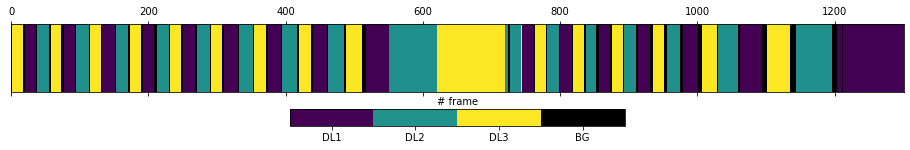

In [101]:

cmap = plt.cm.viridis # define the colormap
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in [0,round(cmap.N/2),cmap.N,cmap.N]]
# force the first color entry to be grey
cmaplist[-1] = (0,0,0,1)

# create the new map
cmap = mpl.colors.LinearSegmentedColormap.from_list(
    'Custom cmap', cmaplist, 4)

prediction = np.asarray(prediction)

plt.matshow(np.repeat([prediction,],100,0),cmap=cmap)
cbar = plt.colorbar(ticks=[3/8,9/8,15/8,21/8],orientation="horizontal")
cbar.ax.set_xticklabels(['DL1','DL2','DL3','BG'])
plt.xlabel('# frame')
plt.yticks([])

In [99]:
np.mean(dt)

0.07276150747426435